In [1]:
#Importemos las librerías necesarias

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
#Call the database

wd = "C:/Users/avalo/OneDrive/Documentos/tec_documentos_plataforma/facebook_work/facebook_mock.csv"

df = pd.read_csv(wd)
df.head()

,Page.total.likes,Type,Category,Post.Month,Post.Weekday,Post.Hour,Paid,LPost.Tot.Reach,LPost.Tot.Impressions,Lifetime.Engaged.Users,LPost.Consumers,LPost.Consumptions,LPost.Liked.Page.Impressions,LPost.Liked.Page.Reach,LPeople.Post.Like...Engange,comment,like,share,Total.Interactions,Clus_km
0,139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100,0
1,139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164,0
2,139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80,0
3,139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777,1
4,139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393,1


In [3]:
#Name of columns
list(df.columns) 

['Page.total.likes',
 'Type',
 'Category',
 'Post.Month',
 'Post.Weekday',
 'Post.Hour',
 'Paid',
 'LPost.Tot.Reach',
 'LPost.Tot.Impressions',
 'Lifetime.Engaged.Users',
 'LPost.Consumers',
 'LPost.Consumptions',
 'LPost.Liked.Page.Impressions',
 'LPost.Liked.Page.Reach',
 'LPeople.Post.Like...Engange',
 'comment',
 'like',
 'share',
 'Total.Interactions',
 'Clus_km']

In [4]:
#Quitamos la columna con el objetivo.
X = df[['Page.total.likes','Type','Category', 'Post.Month', 'Post.Weekday', 'Post.Hour', 'Paid',
        'LPost.Tot.Reach']].values
X[0:5]

array([[139441, 'Photo', 2, 12, 4, 3, 0, 2752],
       [139441, 'Status', 2, 12, 3, 10, 0, 10460],
       [139441, 'Photo', 3, 12, 3, 3, 0, 2413],
       [139441, 'Photo', 2, 12, 2, 10, 1, 50128],
       [139441, 'Photo', 2, 12, 2, 3, 0, 7244]], dtype=object)

In [5]:
#Reescribamos la columna Type pues tupo character
from sklearn import preprocessing
le_type = preprocessing.LabelEncoder()
le_type.fit(['Photo','Status', 'Link','Video'])
X[:,1] = le_type.transform(X[:,1]) 

In [6]:
X[0:5]

array([[139441, 1, 2, 12, 4, 3, 0, 2752],
       [139441, 2, 2, 12, 3, 10, 0, 10460],
       [139441, 1, 3, 12, 3, 3, 0, 2413],
       [139441, 1, 2, 12, 2, 10, 1, 50128],
       [139441, 1, 2, 12, 2, 3, 0, 7244]], dtype=object)

In [7]:
#Ahora extraemos la variable objetivo
y = df["Clus_km"]
y[0:5]

0    0
1    0
2    0
3    1
4    1
Name: Clus_km, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [10]:
X_trainset.shape

(501, 8)

In [11]:
y_trainset.shape

(501,)

In [12]:
X_testset.shape

(215, 8)

In [13]:
y_testset.shape

(215,)

In [15]:
#También normalizamos los datos
#Importamos el modulo para normalizar datos
from sklearn import preprocessing
#Normalizamos las características https://scikit-learn.org/stable/modules/preprocessing.html
my_scaler = preprocessing.StandardScaler()

#Ajustamos
my_scalerf = my_scaler.fit(X)

X=my_scalerf.transform(X)
#Pedimos que nos muestre las primeras filas
X[0:5]

array([[ 0.98254124, -0.29022476,  0.05613374,  1.45753574, -0.02814123,
        -1.04379008, -0.65726707, -0.76822538],
       [ 0.98254124,  1.67016136,  0.05613374,  1.45753574, -0.53186919,
         0.59309224, -0.65726707, -0.45569106],
       [ 0.98254124, -0.29022476,  1.23824433,  1.45753574, -0.53186919,
        -1.04379008, -0.65726707, -0.78197073],
       [ 0.98254124, -0.29022476,  0.05613374,  1.45753574, -1.03559716,
         0.59309224,  1.52145155,  1.15271726],
       [ 0.98254124, -0.29022476,  0.05613374,  1.45753574, -1.03559716,
        -1.04379008, -0.65726707, -0.5860894 ]])

In [16]:
#Llamamos a la función train_test_split
from sklearn.model_selection import train_test_split
#Dividimos los datos originales, dejando el 20% de ellos como conjunto de prueba. Fijamos la semilla en 4.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
#Pedimos que nos muestre el tamaño del conjunto de entrenamiento y el de prueba
print ('Conjunto de entrenamiento:', X_train.shape,  y_train.shape)
print ('Conjunto de prueba:', X_test.shape,  y_test.shape)

Conjunto de entrenamiento: (572, 8) (572,)
Conjunto de prueba: (144, 8) (144,)


In [17]:
#Llamamos a las librerías con las respectivas funciones que se usaran en esta y las subsecuentes secciones
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Creamos el objeto de regresión lineal y lo ajustamos con el conjunto de entrenamiento.
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#Realizamos una predicción usando el conjunto de prueba:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [19]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.53201832, 0.46798168],
       [0.58138212, 0.41861788],
       [0.59154585, 0.40845415],
       [0.14155199, 0.85844801],
       [0.48336043, 0.51663957],
       [0.62156199, 0.37843801],
       [0.3158324 , 0.6841676 ],
       [0.72959119, 0.27040881],
       [0.59858619, 0.40141381],
       [0.6232627 , 0.3767373 ],
       [0.64355577, 0.35644423],
       [0.66408929, 0.33591071],
       [0.43723201, 0.56276799],
       [0.21949651, 0.78050349],
       [0.34118361, 0.65881639],
       [0.51672475, 0.48327525],
       [0.68216808, 0.31783192],
       [0.22027589, 0.77972411],
       [0.70150911, 0.29849089],
       [0.77988499, 0.22011501],
       [0.40590471, 0.59409529],
       [0.59144156, 0.40855844],
       [0.4307739 , 0.5692261 ],
       [0.1262049 , 0.8737951 ],
       [0.63953796, 0.36046204],
       [0.8116361 , 0.1883639 ],
       [0.41218326, 0.58781674],
       [0.65801078, 0.34198922],
       [0.74453092, 0.25546908],
       [0.31416248, 0.68583752],
       [0.

In [20]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8125

In [21]:
#Importamos dos funciones para realizar el reporte de clasificaicón y la matriz de confusión.
from sklearn.metrics import classification_report, confusion_matrix
import itertools

#Creamos una función que calcule la matriz de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusion',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y grafica la matriz de confusión.
    Se puede aplicar la normalización declarando `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción de la etiqueta')


In [22]:
#Calculamos la matriz de confusión
print(confusion_matrix(y_test, yhat, labels=[0,1]))

[[77  7]
 [20 40]]


In [23]:
#Volvemos a calcular la matriz de confusión y la guardamos en cnf_matrix
#indicadmos que deseamos una presicion de 2  la g
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

Matriz de confusión sin normalizar
[[40 20]
 [ 7 77]]


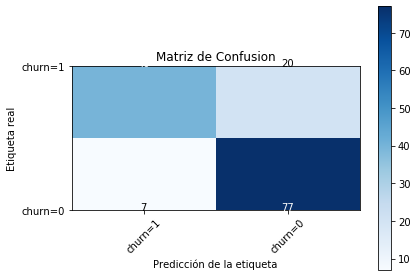

In [24]:
#Graficamos la matriz de confusión no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Matriz de Confusion')

In [25]:
#Pedimos los valores de la precisión y de la recuperación
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        84
           1       0.85      0.67      0.75        60

    accuracy                           0.81       144
   macro avg       0.82      0.79      0.80       144
weighted avg       0.82      0.81      0.81       144



In [26]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5252355838428527